# Import Libraries
#### Standard

In [22]:
import os
import numpy as np
import pandas as pd

#### Visualization

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import colors
from matplotlib import rc
import seaborn as sns
import networkx as nx

#### Visualization Setting

In [24]:
color_palette = 'Set3'
title_size = 20
sns.set_style("whitegrid")

In [25]:
pd.set_option('display.max_rows', 5, 'display.max_columns', None)

In [26]:
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Import Data
Data Preprocessing 단계에서 생성된 통합 데이터 테이블을 불러온다

In [27]:
root = os.path.join(os.getcwd(), 'DATA')

df_raw = pd.read_csv(os.path.join(root, 'raw_data.csv'), index_col = 0)
df_project = pd.read_csv(os.path.join(root, 'project_data.csv'), index_col = 0)

code_jeom = pd.read_csv(os.path.join(root, 'jeom_code.csv'), index_col = 0)
code_jikwhi = pd.read_csv(os.path.join(root, 'jikwhi_code.csv'), index_col = 0)
code_jkmu = pd.read_csv(os.path.join(root, 'jkmu_code.csv'), index_col = 0)

직원 데이터는 지속적으로 참고해야 한다

In [28]:
df_jikwon = pd.read_csv(os.path.join(root, 'jikwon.csv'), encoding='cp949')

----

# Drop Data
2020년 이후로 프로그램을 신규/수정한 적 없는 직원들이 존재한다

In [29]:
df_raw[df_raw['요청번호'].isnull()].sort_values(['HOBONG'])

,JIKWON_NO,JEOM_NO,JIKGUN,JIKGEUB,JIKWHI,JIKWHI2,JUJKMU_C,JUJKMU_RATE,BUJKMU_C,BUJKMU_RATE,JUMJANG_G,HOBONG,BUIM_ILJA,시스템유형,업무그룹,업무,프로그램종류,프로그램명,프로젝트번호,요청일자,요청구분,요청번호,프로그램경로,파트
83715,21501238,507,20040,99999,20019,9,NaN,NaN,NaN,NaN,1,30,20210101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291153,6150020,69,20004,1,20023,1,10895.0,100.0,NaN,0.0,1,980,20200203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72930,21502323,61,30000,0,20425,9,NaN,NaN,NaN,NaN,0,99998,20210318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369698,10618082,61,40002,99999,20456,9,10961.0,100.0,NaN,0.0,0,99998,20200203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이들의 직위를 확인해보면..

In [30]:
with pd.option_context('display.max_rows', df_raw.shape[0]+1):
    display(pd.merge(left=df_raw[df_raw['프로그램명'].isnull()][['JIKWON_NO', 'JIKWHI']], right=code_jikwhi, left_on='JIKWHI', right_on='JIKWHI').groupby(['JIKWHI', 'JIKWHI_NAME']).count())

,,JIKWON_NO
JIKWHI,JIKWHI_NAME,
20019,본부장,1
20023,부장,6
20112,차장,18
20133,부부장,39
20161,과장,7
20164,대리,4
20258,행원,26
20399,팀장(부서장대우),4
20425,전문계약직원,8


프로그램 변경을 안한 직원 제외

In [31]:
print(df_raw.shape, end="->")
df = df_raw.dropna(subset=['요청번호'])
print(df.shape)

(370040, 24)->(369919, 24)


## 요청구분에 따른 분류
요청구분을 봐야할듯

In [32]:
df['요청구분'].unique()

array(['수정', '신규', '무수정', '폐기'], dtype=object)

# 분류하기

### 프로그램종류
프로그램 종류를 파악해서 어떤 언어/툴 등을 사용했는지 파악 가능

In [33]:
df[['프로그램종류']].drop_duplicates().reset_index(drop=True)

,프로그램종류
0,온라인서비스
1,채널화면_txt
...,...
72,웹_C관련
73,웹_xadl(소스)


기술 스택을 파악하기에는 프로그램 종류에 대한 정보가 조금은 부족한 것 같다

각 프로그램 종류에 따라 어떤 언어나 툴을 사용하는지 파악할 수 있다면 좀 더 다양성을 줄이고 포괄적으로 데이터를 볼 수 있을 듯 하다

언어/툴/종류에 따라 아래와 같은 형태로 시각화..

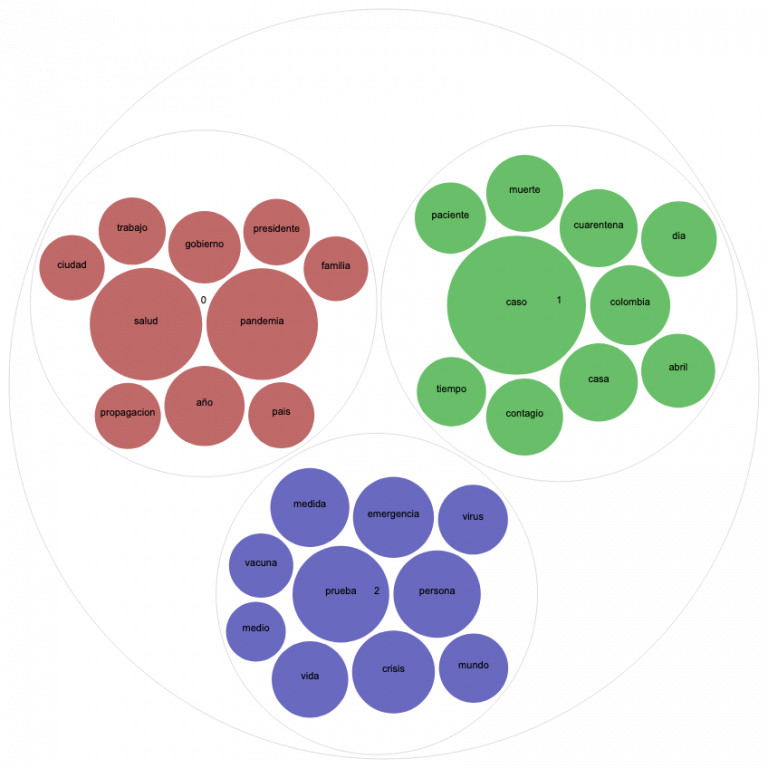

In [45]:
df[df['프로그램종류'].str.startswith('BAT')]

,JIKWON_NO,JEOM_NO,JIKGUN,JIKGEUB,JIKWHI,JIKWHI2,JUJKMU_C,JUJKMU_RATE,BUJKMU_C,BUJKMU_RATE,JUMJANG_G,HOBONG,BUIM_ILJA,시스템유형,업무그룹,업무,프로그램종류,프로그램명,프로젝트번호,요청일자,요청구분,요청번호,프로그램경로,파트
241951,6224490,62,20004,4,20112,2,11035.0,100.0,NaN,0.0,0,26500,20200102,단위,단위(신)_자금세탁방지(AP),단위-자금세탁방지,BAT_Shell,BAlsCSSCODEVALInit.sh,P2020-0153-01,2020-11-19,신규,2020-04-054138,/MlsAmgAlsBatch/META-INF/shells,BI
241962,6224490,62,20004,4,20112,2,11035.0,100.0,NaN,0.0,0,26500,20200102,단위,단위(신)_자금세탁방지(AP),단위-자금세탁방지,BAT_Bean,MAlsKRiskftMExtrBtch.java,P2020-06334-01,2020-06-11,수정,2020-04-033235,/MlsAmgAlsBatch/src/mls/amg/als/bean,BI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329677,20100231,62,20004,5,20258,3,11597.0,100.0,NaN,0.0,0,47230,20200129,단위,단위(신)_자금세탁방지(AP),단위-자금세탁방지,BAT_Shell,BAlsCAglAccodeLoad.sh,P2020-09960-01,2020-08-28,신규,2020-04-044369,/MlsAmgAlsBatch/META-INF/shells,컴플라이언스
329680,20100231,62,20004,5,20258,3,11597.0,100.0,NaN,0.0,0,47230,20200129,단위,단위(신)_자금세탁방지(AP),단위-자금세탁방지,BAT_Shell,BAlsCAglAccodeLoad.sh,P2020-09960-01,2020-09-03,수정,2020-04-044854,/MlsAmgAlsBatch/META-INF/shells,컴플라이언스


In [15]:
def (row):
    program = row['프로그램종류']
    if program == '.net(dll)':
        return "VB"
    elif program == '2PC배치':
        
    elif program == 'BAT_Bean':
        
    elif program == 'BAT_DBIO':
        
    elif program == 'BAT_JAVA':
        
    elif program == 'BAT_OMM':
        
    elif program == 'BAT_Shell':
        
    elif program == 'BAT_배치':
        
    elif program == 'CONFIG':
        return "Shell"
    elif program == 'CTL':
        
    elif program == 'DBIO':
        
    elif program == 'DBIO MAP':
        
    elif program == 'FLEX(.mxml)':
        return "FLEX"        
    elif program == 'FLEX(.swf)':
        return "FLEX"        
    elif program == 'FLEX(/bin 파일)':
        return "FLEX"
    elif program == 'FLEX(/src 파일)':
        return "FLEX"
    elif program == 'GIT프로젝트':
        
    elif program == 'HTML':
        return "HTML"
    elif program == 'HTML5_html':
        return "HTML"
    elif program == 'HTML5_xml':
        return "HTML"
    elif program == 'HTML5_스크립트':
        return "HTML"
    elif program == 'HTML5_이미지':
        return "HTML"
    elif program == 'Header FILE':
        return "HEADER"
    elif program == 'IO포맷':
        
    elif program == 'IO포맷 ALL':
        
    elif program == 'Image':
        
    elif program == 'Java':
        return "JAVA"
    elif program == 'MODULE':
        return "C"
    elif program == 'ONL_Bean':
        
    elif program == 'ONL_DBIO':
        
    elif program == 'ONL_JAVA':
        
    elif program == 'ONL_JAVA Module':
        
    elif program == 'ONL_OMM':
        
    elif program == 'PACKAGE':
        
    elif program == 'SCRIPT':
        
    elif program == 'SHELL':
        return "Shell"
    elif program == 'SQL':
        return "SQL"
    elif program == 'XML':
        
    elif program == '거래코드':
        
    elif program == '공통모듈':
        
    elif program == '배치':
        
    elif program == '배치(*.pc)':
        return "C"
    elif program == '배치코드':
        
    elif program == '상주배치':
        return "C"
    elif program == '스크립트(긴급)':
        
    elif program == '스크립트(일반)':
        
    elif program == '실행모듈(서버)':
        return "Server"
    elif program == '연동코드':
        
    elif program == '온라인서비스':
        return "C"
    elif program.startswith('웹'):
        return "Web"
    elif program == '채널매핑룰':
        return "기타"
    elif program == '채널매핑룰.chl':
        
    elif program == '채널매핑룰.rule':
        
    elif program == '채널화면_MAP':

    elif program == '채널화면_js':
        
    elif program == '채널화면_mrd':
        return "채널화면_mrd"
    elif program == '채널화면_scn':
        
    elif program == '채널화면_trn':
        
    elif program == '채널화면_txt':
        
    elif program == '프로프레임소스(.c)':
        
    elif program == '화면_VB':
        return "VB":
    elif program == '후행성배치':
        

array(['온라인서비스', '채널화면_txt', '배치', '거래코드', '채널화면_MAP', 'IO포맷 ALL',
       'DBIO MAP', 'DBIO', '공통모듈', '채널화면_mrd', '채널매핑룰', '웹_JSP', '연동코드',
       'SHELL', '상주배치', 'IO포맷', 'Header FILE', 'CONFIG', 'XML', 'Java',
       '실행모듈(서버)', 'HTML5_xml', '배치(*.pc)', 'MODULE', 'HTML5_스크립트',
       'FLEX(/bin 파일)', 'SCRIPT', 'FLEX(/src 파일)', '프로프레임소스(.c)',
       '웹_비지니스(.xml)', '웹_서식(.xml)', 'Image', 'SQL', 'HTML', '웹_환경파일',
       'FLEX(.swf)', 'FLEX(.mxml)', '웹_jar', '웹_xfdl(소스)', '웹_화면', '웹_문서',
       '웹_문서(.pdf)', 'PACKAGE', '화면_VB', '.net(dll)', 'CTL', '2PC배치',
       '채널매핑룰.rule', '채널매핑룰.chl', 'HTML5_이미지', '웹_기타(IT)', '후행성배치',
       'GIT프로젝트', 'HTML5_html', '웹_기타(본부)', 'ONL_OMM', 'ONL_JAVA',
       'ONL_DBIO', '채널화면_scn', '채널화면_trn', '배치코드', '채널화면_js', 'BAT_Shell',
       'BAT_Bean', 'BAT_배치', 'ONL_Bean', '스크립트(일반)', 'BAT_DBIO',
       'BAT_OMM', 'BAT_JAVA', 'ONL_JAVA Module', '스크립트(긴급)', '웹_C관련',
       '웹_xadl(소스)'], dtype=object)

In [140]:
df[['COL03']].drop_duplicates().reset_index(drop=True)

,COL03
0,펌뱅킹
1,가상계좌
...,...
400,2017 어드민proworks
401,인도네시아 SOL Inswave 비대면


In [268]:
df[['JIKWON_NO', '프로그램종류', '신청번호']].groupby(['JIKWON_NO', '프로그램종류']).count()

신청번호
JIKWON_NO 프로그램종류         
6126995   .net(dll)     1
          DBIO          4
...                   ...
21200191  채널화면_MAP      2
          채널화면_txt      2

[3035 rows x 1 columns]

직원 한명에 대해서만 본다고 생각했을때,
**프로그램종류**를 봐서 기술스택 파악을 할 수 있을 것

6163718 직원에 대한 정보를 봐보자


In [47]:
df_6163718 = df[df['JIKWON_NO'] == 6163718]

### 프로그램종류

In [490]:
with pd.option_context('display.max_rows', df.shape[0]+1):
    display(df_6163718[['JIKWON_NO', '프로그램종류', '신청번호']].groupby(['JIKWON_NO', '프로그램종류']).count())

신청번호
JIKWON_NO 프로그램종류            
6163718   DBIO            10
          DBIO MAP        40
          Header FILE      9
          IO포맷             2
          IO포맷 ALL        10
          MODULE          93
          SHELL            9
          XML              9
          거래코드            18
          공통모듈             2
          배치              18
          배치(*.pc)        35
          상주배치             4
          실행모듈(서버)        67
          연동코드            13
          온라인서비스          83
          웹_비지니스(.xml)     3
          웹_서식(.xml)       4
          채널매핑룰           10
          채널화면_MAP        15
          채널화면_mrd         3
          채널화면_txt        15

In [492]:
df_6163718['A'] = df_6163718.apply(lambda x: add_class(x), axis=1)

<ipython-input-492-27ca30fd482e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6163718['A'] = df_6163718.apply(lambda x: add_columns(x), axis=1)


In [494]:
df_6163718['COUNT'] = df_6163718.groupby(['A', '프로그램종류'])[['JIKWON_NO']].transform('count')

<ipython-input-494-e6213cec2298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6163718['COUNT'] = df_6163718.groupby(['A', '프로그램종류'])[['JIKWON_NO']].transform('count')


In [495]:
df_기술 = df_6163718[['JIKWON_NO', 'A', '프로그램종류', 'COUNT']].drop_duplicates().sort_values(['A', '프로그램종류']).reset_index(drop=True)

In [496]:
with pd.option_context('display.max_rows', df_기술.shape[0]+1):
    display(df_기술)

,JIKWON_NO,A,프로그램종류,COUNT
0,6163718,Batch,배치,18
1,6163718,Batch,배치(*.pc),35
2,6163718,Batch,상주배치,4
3,6163718,Channel,채널매핑룰,10
4,6163718,Channel,채널화면_MAP,15
5,6163718,Channel,채널화면_mrd,3
6,6163718,Channel,채널화면_txt,15
7,6163718,Code,거래코드,18
8,6163718,Code,연동코드,13
9,6163718,IO,DBIO,10


In [532]:
# Set Edges
f1 = list(df_기술['JIKWON_NO'].array) + list(df_기술['A'].array)
t1 = list(df_기술['A'].array) + list(df_기술['프로그램종류'].array)

relationship1 = pd.DataFrame({'from': f1, 'to': t1})

In [533]:
# Set Visual
# carac = pd.DataFrame({'ID': [6163718] + tmp + tmp2, 
#                       'type': ['no'] + ['A' for _ in range(len(tmp))] + ['program' for _ in range(len(tmp2))]})
# carac.set_index('ID')

In [546]:
node_sizes1 = [2500 for _ in range(len(df_기술['A'].unique()))] + list(map(lambda x: x * 200, df_기술['COUNT'].array))

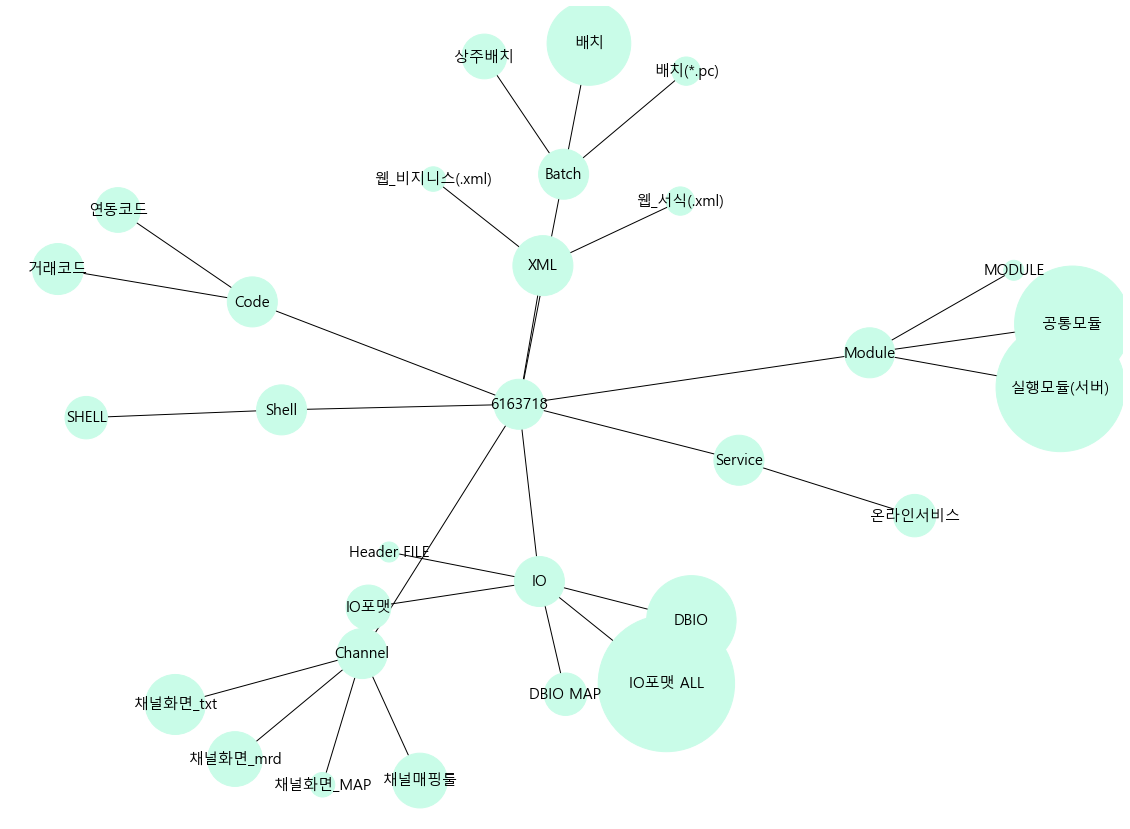

In [548]:
fig, ax = plt.subplots(figsize=(20,15))
G = nx.from_pandas_edgelist(relationship1, 'from', 'to', create_using=nx.Graph())
#carac = carac.reindex(G.nodes())
#carac['type'] = pd.Categorical(carac['type'])
# carac['type'].cat.codes
# cmap = colors.ListedColormap(['C0', 'darkorange'])

# nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, node_size=2000, font_family=font_name, font_size=15)

nx.draw(G, with_labels=True, node_color='#c9fce8', node_size=node_sizes1, font_family=font_name, font_size=15)

### 시스템유형
어떤 업무인지 파악 > 직원의 업무 역량 파악 가능

In [37]:
with pd.option_context('display.max_rows', df.shape[0]+1):
    display(df[['시스템유형', '업무그룹', '업무', '파트', '요청번호', '프로그램명']].groupby(['시스템유형', '업무그룹', '업무', '파트']).count())

요청번호  \
시스템유형    업무그룹                                   업무                            파트                
단위       (U2L)단위-PB                             단위-PB                         CRM           3   
                                                                              ICTRM         7   
                                                                              MyData        1   
         (U2L)단위-PRB                            단위-SAMS                       CRM         174   
                                                                              ICTRM       495   
                                                                              MyData       10   
         (U2L)단위-경영지원시스템                        단위-경영정보지원                     빅데이터          1   
         (U2L)단위-관리회계 및 성과 관리                   단위-관리회계성과관리                   BI           17   
                                                                              CRM           2   
         (U2L)단위-신용리스크(RWA)                     단위-RWA                        Risk       3060   
         (U2L)단위-신용리스크(대손충당금)                   단위-신용리스크(대손충당금)               CRM         628   
                                                                              Risk         74   
         (U2L)단위-신용리스크(회수관리)                    단위-신용리스크(회수관리)                Risk        350   
         (U2L)단위-운영리스크                          단위-공통관리                       Risk          2   
         (U2L)단위-이상거래탐지                         단위-이상거래탐지                     BI            2   
                                                                              컴플라이언스      326   
         (U2L)단위-인프라                            단위-System management software MyData        6   
         (U2L)단위-재무회계단위시스템                      단위-재무회계 단위 시스템 모듈             BI          320   
         (U2L)단위-통합CRM                          단위-통합CRM                      BI           62   
                                                                              CRM        4439   
                                                                              ICTRM     14699   
                                                                              ICT감사         7   
                                                                              MyData     1004   
                                                                              마케팅         278   
                                                                              빅데이터          2   
         (U2L)단위-퇴직신탁                           단위-퇴직신탁                       퇴직연금        433   
         (U2L)단위-퇴직연금컨설팅                        단위-퇴직연금컨설팅                    퇴직연금        927   
         (U2L)단위-퇴직연금통합플랫폼                      단위-퇴직연금통합플랫폼                  BI         1236   
         (U2L)바젤II-리스크보고서                       단위-리스크보고서관리                   Risk          7   
         (U2L)바젤II-신용리스크                        단위-RWA                        CRM          77   
                                                                              Risk         16   
                                                단위-RiskComponent              CRM        2520   
                                                                              Risk         55   
                                                단위-바젤원천데이터                    CRM         835   
                                                                              Risk        254   
                                                단위-자산건전성시스템관리                 CRM          26   
                                                                              Risk          5   
         Cloud_IOG플랫폼                           Cloud_IOG플랫폼                  Cloud        31   
         단위(신)_자금세탁방지(AP)                       단위-자금세탁방지                     BI         2256   
                                                                              컴플라이언스      531   
         단위(신)_

In [48]:
with pd.option_context('display.max_rows', df_6163718.shape[0]+1):
    display(df_6163718[['시스템유형', '업무그룹', '업무', '파트', '요청번호', '프로그램명']].groupby(['시스템유형', '업무그룹', '업무', '파트']).count())

요청번호  프로그램명
시스템유형 업무그룹             업무              파트               
단위    단위-대외계           단위-대외계Interface 지불결제     2      2
                       단위-대외계펌뱅킹       지불결제   243    243
웹컨텐츠  디지털창구_전자서식       디지털창구_전자서식      지불결제     7      7
코어    External Channel 전자금융            지불결제     3      3
                       펌뱅킹             지불결제   217    217

In [518]:
df_6163718['B_COUNT'] = df_6163718.groupby(['시스템구분', 'COL02', 'COL03'])[['JIKWON_NO']].transform('count')

<ipython-input-518-616a9539d1c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6163718['B_COUNT'] = df_6163718.groupby(['시스템구분', 'COL02', 'COL03'])[['JIKWON_NO']].transform('count')


In [519]:
df_업무 = df_6163718[['JIKWON_NO', '시스템구분', 'COL02', 'COL03', 'B_COUNT']].drop_duplicates().sort_values(['시스템구분', 'COL03', 'COL03']).reset_index(drop=True)

In [520]:
with pd.option_context('display.max_rows', df_업무.shape[0]+1):
    display(df_업무)

,JIKWON_NO,시스템구분,COL02,COL03,B_COUNT
0,6163718,단위,단위-대외계,단위-대외계Interface,2
1,6163718,단위,단위-대외계,단위-대외계펌뱅킹,243
2,6163718,웹컨텐츠,디지털창구_전자서식,디지털창구_전자서식,7
3,6163718,코어,External Channel,전자금융,3
4,6163718,코어,External Channel,펌뱅킹,217


In [521]:
# Set Edges
f2 = list(df_업무['JIKWON_NO'].array) + list(df_업무['시스템구분'].array) + list(df_업무['COL02'].array)
t2 = list(df_업무['시스템구분'].array) + list(df_업무['COL02'].array) + list(df_업무['COL03'].array)

relationship2 = pd.DataFrame({'from': f2, 'to': t2})

In [522]:
# Set Visual
# carac = pd.DataFrame({'ID': [6163718] + tmp + tmp2, 
#                       'type': ['no'] + ['A' for _ in range(len(tmp))] + ['program' for _ in range(len(tmp2))]})
# carac.set_index('ID')

In [549]:
tmp_length = len(df_업무['시스템구분'].unique()) + len(df_업무['COL02'].unique())
node_sizes1 = [2500 for _ in range(tmp_length)] + list(map(lambda x: x * 200, df_업무['B_COUNT'].array))

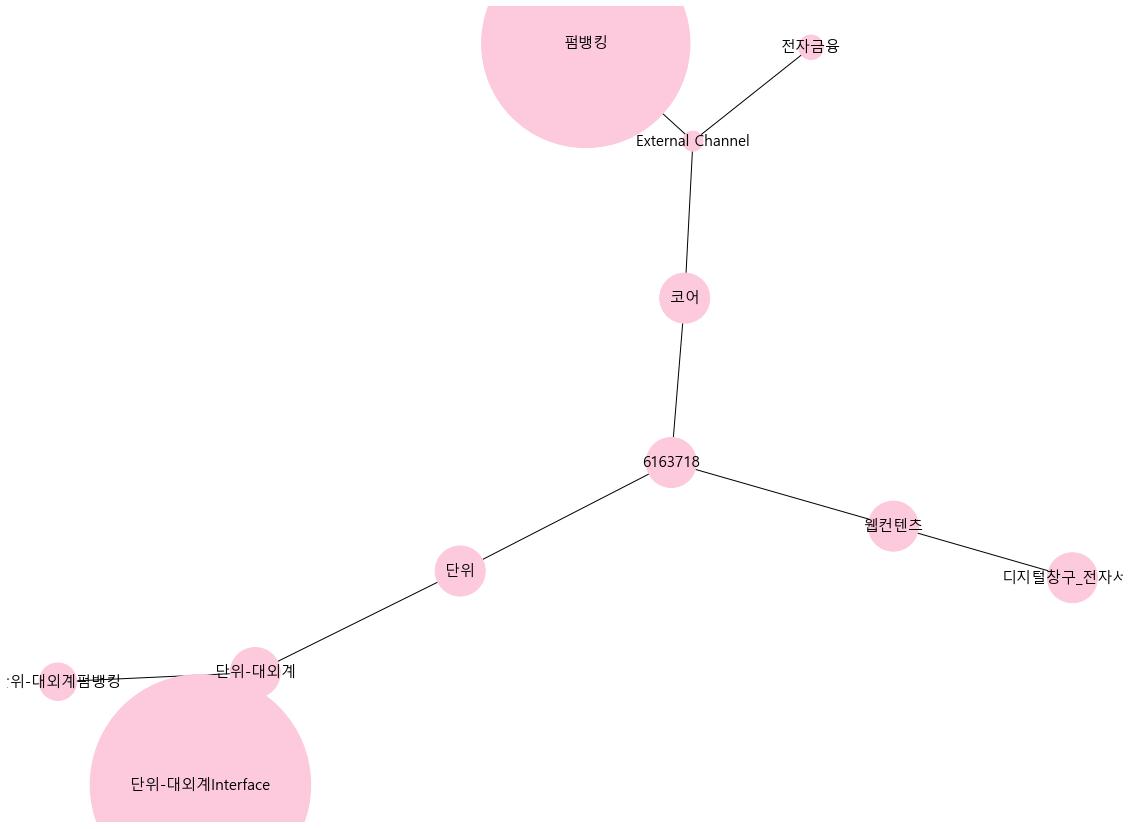

In [550]:
fig, ax = plt.subplots(figsize=(20,15))
G = nx.from_pandas_edgelist(relationship2, 'from', 'to', create_using=nx.Graph())

nx.draw(G, with_labels=True, node_color='#fcc9dd', node_size=node_sizes1, font_family=font_name, font_size=15)

# 프로젝트 기반 분석
프로젝트에 참여한 사람들 기반으로 adjacency matrix 구축해서 보여주기?